In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple

sns.set_palette(palette="Reds")

In [ ]:
n, m = 500, 2

w_true = np.random.standard_normal(m)

X = np.random.uniform(-5, 5, (n, m))
X *= (np.arange(m) * 2 + 1)[np.newaxis, :]

y = X.dot(w_true) + np.random.normal(0, 1, (n))

In [ ]:
def momentum_optimizer(steps: int, alpha: float, beta: float, X: np.ndarray, y: np.ndarray, w = None, eps=1) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    n, m = X.shape[0], X.shape[1]

    if w is None:
        w = np.random.standard_normal(m)

    w_cur = w.copy()
    w_history = [w_cur]
    err_history = []
    v = np.zeros_like(w_cur)

    for i in range(steps):
        y_pred = X.dot(w_cur)
        err = y_pred - y
        grad = 2 * X.T.dot(err) / n

        if i == 0:
            print(grad)

        if np.sum(grad**2)**0.5 < eps:
            break

        v = beta * v + (1 - beta) * grad
        w_cur -= alpha * v

        w_history.append(w_cur.copy())
        err_history.append(err.mean())

    print(w_cur)
    return w_cur, np.array(w_history), np.array(err_history)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_weight_levels(X, y, w_history: np.ndarray):
    w1_vals = np.linspace(min(w_history[:, 0]) - 1, max(w_history[:, 0]) + 1, 100)
    w2_vals = np.linspace(min(w_history[:, 1]) - 1, max(w_history[:, 1]) + 1, 100)

    W1, W2 = np.meshgrid(w1_vals, w2_vals)
    J_vals = np.zeros_like(W1)

    for i in range(len(w1_vals)):
        for j in range(len(w2_vals)):
            w_tmp = np.array([W1[i, j], W2[i, j]])
            J_vals[i, j] = np.mean((X.dot(w_tmp) - y) ** 2) / 2

    plt.figure(figsize=(12, 8))
    plt.contour(W1, W2, J_vals, levels=30, cmap='viridis')

    # w_history = w_history[w_history[:, 0].argsort()[::-1]]
    print(w_history[-1])
    plt.scatter(w_history[-1][0], w_history[-1][1], marker='*', s=200, color='black', label='Final Point')

    plt.plot(w_history[:, 0], w_history[:, 1], marker='o', linestyle='-', color='red', label='Gradient Descent Trajectory')

    plt.title('Weight Levels and Gradient Descent Trajectory')
    plt.xlabel('Weight 1')
    plt.ylabel('Weight 2')
    plt.legend()
    plt.show()

[-16.28276988 245.56712435]
[ 0.24746663 -0.66488082]
[ 0.24746663 -0.66488082]

[ 0.24746663 -0.66488082]


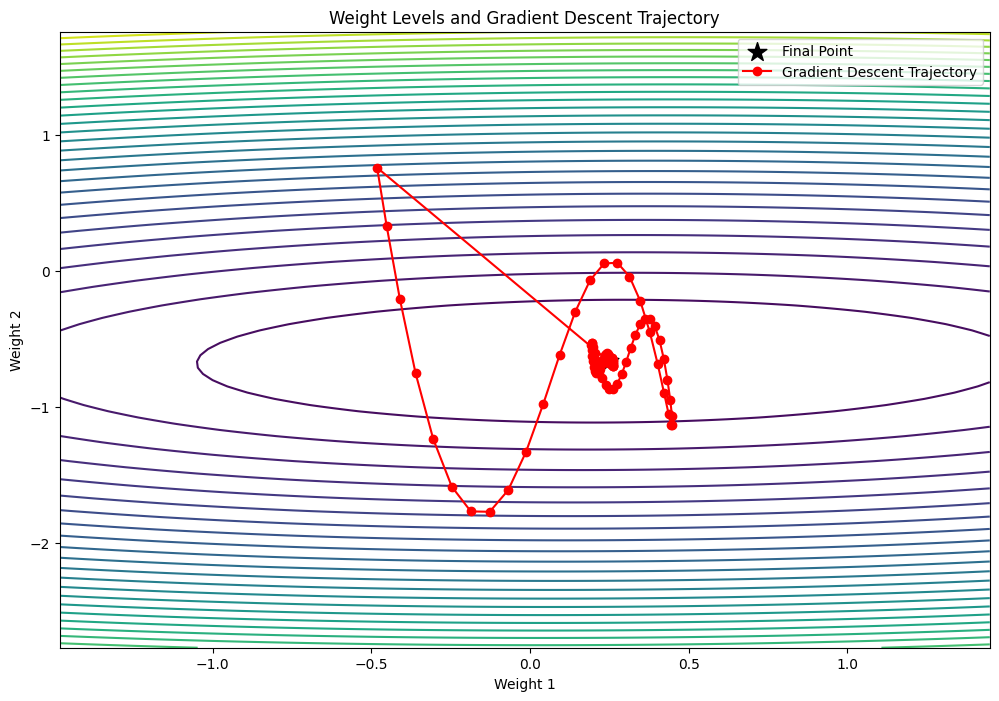

In [ ]:
w, w_history, _ = momentum_optimizer(5000, 0.01, 0.9, X=X, y=y, eps=1e-8)
print(w_history[-1])
print()
plot_weight_levels(X, y, w_history)

In [ ]:
def rmsprop_optimizer(steps: int, alpha: float, beta: float, X: np.ndarray, y: np.ndarray, w = None, eps=1, eps_rms=1e-8) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    n, m = X.shape[0], X.shape[1]

    if w is None:
        w = np.random.standard_normal(m)

    w_cur = w.copy()
    w_history = [w_cur]
    err_history = []
    rms = np.zeros_like(w_cur)

    for i in range(steps):
        y_pred = X.dot(w_cur)
        err = y_pred - y
        grad = 2 * X.T.dot(err) / n

        if i == 0:
            print(grad)

        if np.sum(grad**2)**0.5 < eps:
            break

        rms = beta * rms + (1 - beta) * grad**2
        w_cur -= alpha * grad / (np.sqrt(rms) + eps_rms)

        w_history.append(w_cur.copy())
        err_history.append(err.mean())

    return w_cur, np.array(w_history), np.array(err_history)

[  14.61086408 -150.48582028]
[ 0.24746663 -0.66488082]

[ 0.24746663 -0.66488082]


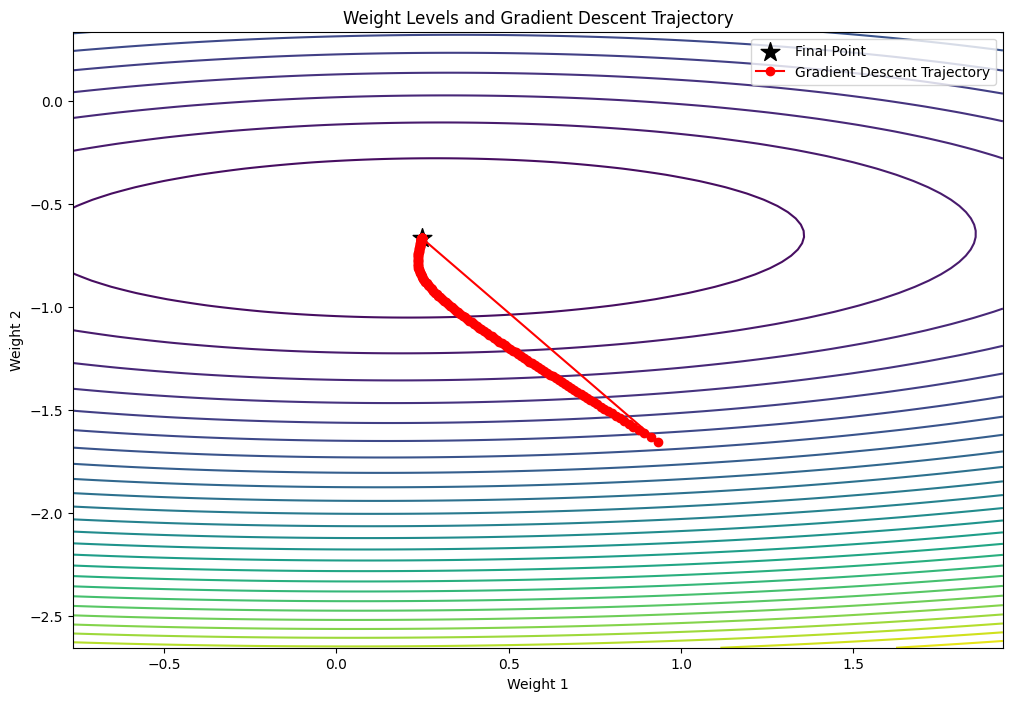

In [ ]:
w, w_history, _ = rmsprop_optimizer(5000, 0.01, 0.9, X=X, y=y, eps=1e-8)
print(w_history[-1])
print()
plot_weight_levels(X, y, w_history)

In [ ]:
def adam_optimizer(steps: int, alpha: float, beta1: float, beta2: float, X: np.ndarray, y: np.ndarray, w = None, eps=1, eps_adam=1e-8) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    n, m = X.shape[0], X.shape[1]

    if w is None:
        w = np.random.standard_normal(m)

    w_cur = w.copy()
    w_history = [w_cur]
    err_history = []
    m = np.zeros_like(w_cur)
    v = np.zeros_like(w_cur)
    t = 0

    for i in range(steps):
        y_pred = X.dot(w_cur)
        err = y_pred - y
        grad = 2 * X.T.dot(err) / n

        if i == 0:
            print(grad)

        if np.sum(grad**2)**0.5 < eps:
            break

        t += 1
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2

        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        w_cur -= alpha * m_hat / (np.sqrt(v_hat) + eps_adam)

        w_history.append(w_cur.copy())
        err_history.append(err.mean())

    return w_cur, np.array(w_history), np.array(err_history)

[ 8.70384949 57.67575556]
[ 0.24746663 -0.66488082]

[ 0.24746663 -0.66488082]


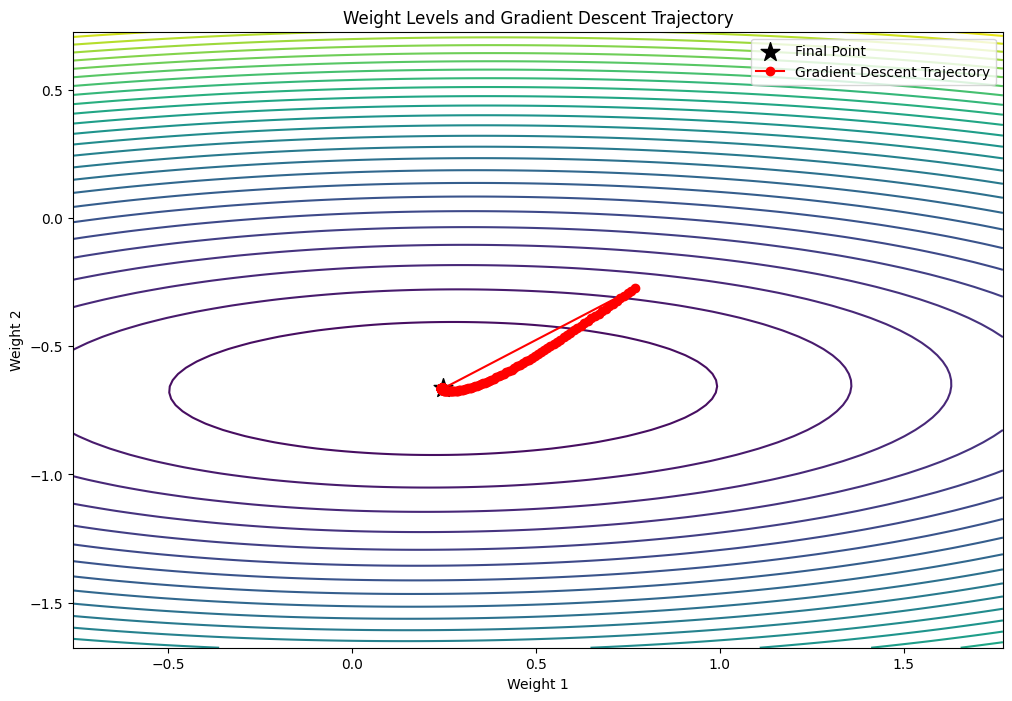

In [ ]:
w, w_history, _ = adam_optimizer(5000, 0.01, 0.9, 0.99, X=X, y=y, eps=1e-8)
print(w_history[-1])
print()
plot_weight_levels(X, y, w_history)

Adam демонстрирует быструю и стабильную сходимость на различных размерностях задачи. RMSprop и momentum могут быть слегка медленнее по сравнению с Adam.
Adam имеет высокую точность. RMSprop показал неплохую точность, но может требовать большего числа итераций. Momentum также имеет хорошую точность, однако более чувствителен к выбору параметров.

Т.о. Adam является наиболее универсальным методом и зачастую показывает себя лучше, чем остальные оптимайзеры.